# Descripci√≥n

La compa√±√≠a de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que eval√∫es esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudar√° a los agentes de la compa√±√≠a con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestaci√≥n del seguro. ¬øPuede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el n√∫mero de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresi√≥n lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformaci√≥n de datos que dificulte la recuperaci√≥n de la informaci√≥n personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscaci√≥n de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploraci√≥n de datos

## Inicializaci√≥n

In [313]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [315]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
 
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import f1_score

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisi√≥n b√°sica para comprobar que no hay problemas obvios.

In [319]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el c√≥digo se vea m√°s coherente con su estilo.

In [322]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [324]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
438        0  36.0  36300.0               1                   0
794        0  26.0  40800.0               4                   0
4750       1  25.0  48700.0               2                   0
3968       0  22.0  32400.0               2                   0
4825       1  23.0  31500.0               0                   0
4062       0  41.0  21800.0               3                   0
4617       1  19.0  45400.0               0                   0
3616       0  26.0  52000.0               0                   0
2661       1  21.0  29400.0               2                   0
1292       0  23.0  48000.0               1                   0

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [326]:
# comprueba que la conversi√≥n se haya realizado con √©xito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [328]:
print(df[df.duplicated()])

      gender   age   income  family_members  insurance_benefits
281        1  39.0  48100.0               1                   0
488        1  24.0  32900.0               1                   0
513        0  31.0  37400.0               2                   0
718        1  22.0  32600.0               1                   0
785        0  20.0  35800.0               0                   0
...      ...   ...      ...             ...                 ...
4793       1  24.0  37800.0               0                   0
4902       1  35.0  38700.0               1                   0
4935       1  19.0  32700.0               0                   0
4945       1  21.0  45800.0               0                   0
4965       0  22.0  40100.0               1                   0

[153 rows x 5 columns]


In [329]:
# ahora echa un vistazo a las estad√≠sticas descriptivas de los datos.# ¬øSe ve todo bien?
df.describe()

gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000

Genero: Muestra una media de aproximadamente 0.5 lo que indica que hay un balance entre hombres y mujeres. El valor m√≠nimo es 0 y el m√°ximo es 1 lo que es entendible si se ocupan 0 y 1 para distinguir entre g√©nero.

Age: Tiene rangos de edades entre 18 y 65 parecen a√±os normales para una aseguradora, la media tambi√©n parece entendible junto con la desviaci√≥n est√°ndar por lo que no se encuentran valores anormales

Inocme: Tampoco se observan valores at√≠picos, s√≥lo se observa que se que cubre una amplia diversidad de ingresos.

Family members: va entre 0 y 6 familiares lo que parece com√∫n, no llega a ser exagerado y no tiene valores inesperados. Al parecer la media son entre 1 y 2 miembros.

Insurance benefits: la media es baja lo que nos dice que hay muy poca gente que recibe este beneficio, la mayor√≠a tiene 0 prestaciones. Sin embargo, no parece algo fuera de lo com√∫n.

**Conclusi√≥n**

* No se encontraron datos sospechosos ni anormales en este tipo de datos por lo que se puede continuar a los siguientes pasos.
* Se encontraron 153 datos duplicados pero igualmente parece aceptable este n√∫mero de coincidencias teniendo 5000 datos

## An√°lisis exploratorio de datos

Vamos a comprobar r√°pidamente si existen determinados grupos de clientes observando el gr√°fico de pares.

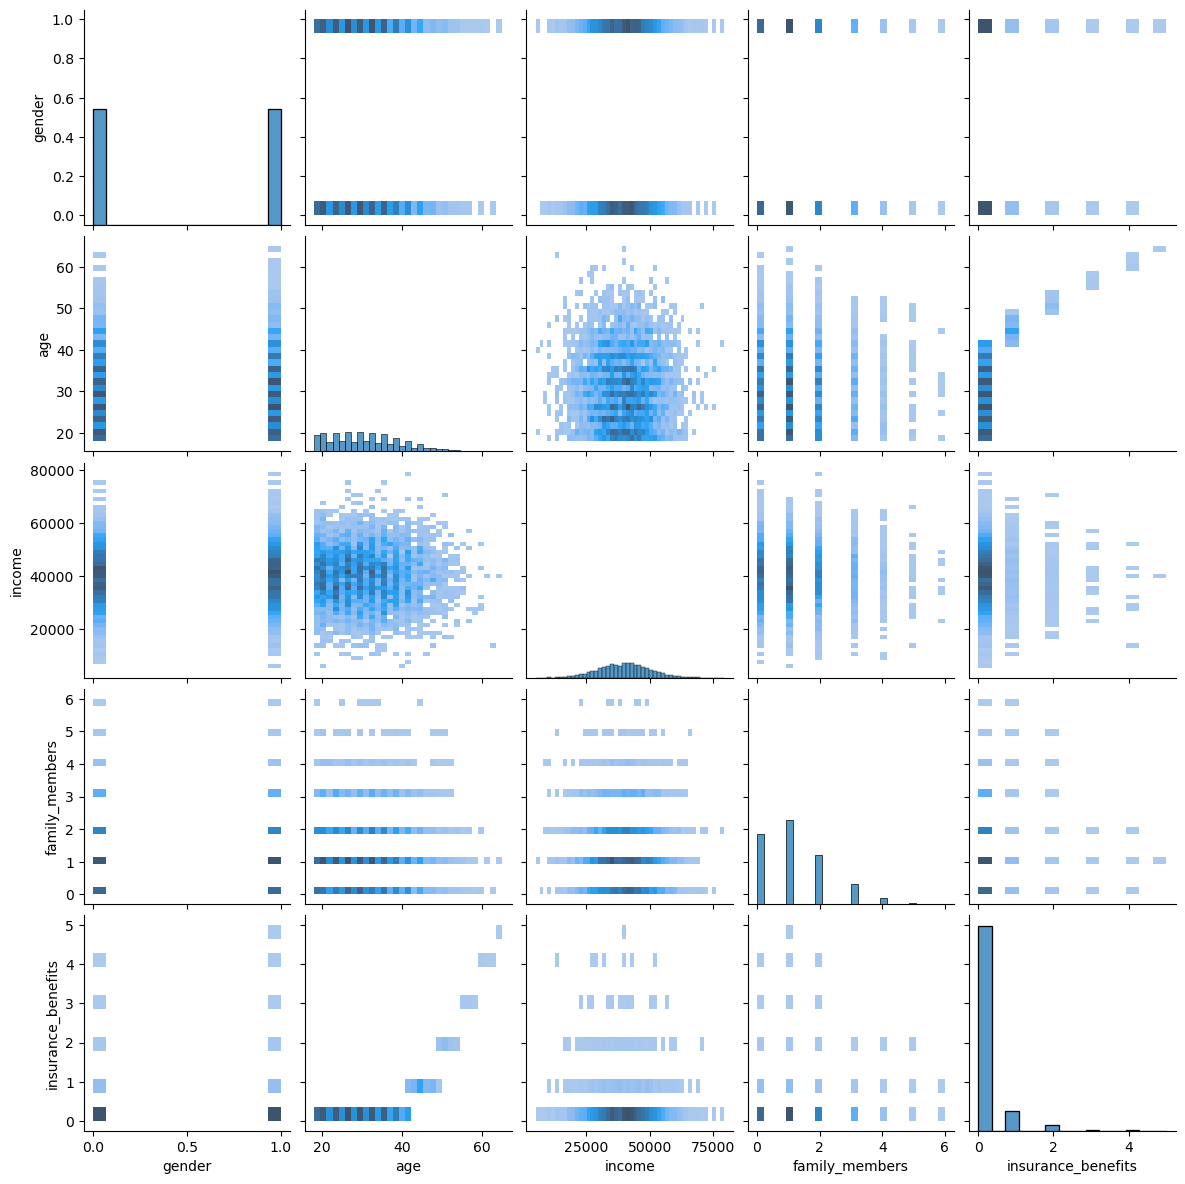

In [338]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (cl√∫steres) ya que es dif√≠cil combinar diversas variables simult√°neamente (para analizar distribuciones multivariadas). Ah√≠ es donde LA y ML pueden ser bastante √∫tiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos m√°s cercanos (objetos) para un objeto dado bas√°ndose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (cap√≠tulo -> lecci√≥n)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes m√©tricas de distancia.

Escribe una funci√≥n que devuelva los k vecinos m√°s cercanos para un $n^{th}$ objeto bas√°ndose en una m√©trica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el n√∫mero de prestaciones de seguro recibidas.
Puedes utilizar una implementaci√≥n ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementaci√≥n.
Pru√©balo para cuatro combinaciones de dos casos- Escalado
  - los datos no est√°n escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- M√©tricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?- ¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?

In [343]:
feature_names = ['gender', 'age', 'income', 'family_members']
print(df[feature_names].values)

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]


In [344]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos m√°s cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    :param n: n√∫mero de objetos para los que se buscan los vecinos m√°s cercanos    :param k: n√∫mero de vecinos m√°s cercanos a devolver
    :param m√©trica: nombre de la m√©trica de distancia    """

    nbrs =  NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [349]:
# Elegimos las columnas a escalar
feature_names = ['gender', 'age', 'income', 'family_members']
# Por futuros errores cambiamos el tipo de dato de la columna 'family_members'
df['family_members'] = df['family_members'].astype(float)

# Escalamos los datos
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [351]:
df_scaled.sample(5)

gender       age    income  family_members  insurance_benefits
1019       1  0.646154  0.501266        0.333333                   0
27         1  0.461538  0.440506        0.166667                   0
965        1  0.430769  0.316456        0.500000                   0
1361       0  0.630769  0.427848        0.000000                   0
3232       0  0.630769  0.305063        0.833333                   0

Ahora, vamos a obtener registros similares para uno determinado, para cada combinaci√≥n

In [354]:
# Cliente espec√≠fico (por ejemplo, √≠ndice 0)
n = 0
k = 5  # N√∫mero de vecinos m√°s cercanos a obtener

# 1. Sin escalado, distancia Euclidiana
print("Sin escalado, distancia Euclidiana")
result_1 = get_knn(df, n=n, k=k, metric='euclidean')
display(result_1)
display(result_1.describe())

# 2. Sin escalado, distancia Manhattan
print("\nSin escalado, distancia Manhattan")
result_2 = get_knn(df, n=n, k=k, metric='manhattan')
display(result_2)
display(result_2.describe())

# 3. Con escalado (MaxAbsScaler), distancia Euclidiana
print("\nCon escalado, distancia Euclidiana")
result_3 = get_knn(df_scaled, n=n, k=k, metric='euclidean')
display(result_3)
display(result_3.describe())

# 4. Con escalado (MaxAbsScaler), distancia Manhattan
print("\nCon escalado, distancia Manhattan")
result_4 = get_knn(df_scaled, n=n, k=k, metric='manhattan')
display(result_4)
display(result_4.describe())

Sin escalado, distancia Euclidiana


gender   age   income  family_members  insurance_benefits  distance
0          1  41.0  49600.0             1.0                   0  0.000000
2022       1  41.0  49600.0             0.0                   0  1.000000
1225       0  42.0  49600.0             0.0                   1  1.732051
4031       1  44.0  49600.0             2.0                   1  3.162278
3424       0  38.0  49600.0             0.0                   0  3.316625

gender        age   income  family_members  insurance_benefits  \
count  5.000000   5.000000      5.0        5.000000            5.000000   
mean   0.600000  41.200000  49600.0        0.600000            0.400000   
std    0.547723   2.167948      0.0        0.894427            0.547723   
min    0.000000  38.000000  49600.0        0.000000            0.000000   
25%    0.000000  41.000000  49600.0        0.000000            0.000000   
50%    1.000000  41.000000  49600.0        0.000000            0.000000   
75%    1.000000  42.000000  49600.0        1.000000            1.000000   
max    1.000000  44.000000  49600.0        2.000000            1.000000   

       distance  
count  5.000000  
mean   1.842191  
std    1.417010  
min    0.000000  
25%    1.000000  
50%    1.732051  
75%    3.162278  
max    3.316625


Sin escalado, distancia Manhattan


gender   age   income  family_members  insurance_benefits  distance
0          1  41.0  49600.0             1.0                   0       0.0
2022       1  41.0  49600.0             0.0                   0       1.0
1225       0  42.0  49600.0             0.0                   1       3.0
4031       1  44.0  49600.0             2.0                   1       4.0
815        1  37.0  49600.0             2.0                   0       5.0

gender       age   income  family_members  insurance_benefits  \
count  5.000000   5.00000      5.0             5.0            5.000000   
mean   0.800000  41.00000  49600.0             1.0            0.400000   
std    0.447214   2.54951      0.0             1.0            0.547723   
min    0.000000  37.00000  49600.0             0.0            0.000000   
25%    1.000000  41.00000  49600.0             0.0            0.000000   
50%    1.000000  41.00000  49600.0             1.0            0.000000   
75%    1.000000  42.00000  49600.0             2.0            1.000000   
max    1.000000  44.00000  49600.0             2.0            1.000000   

       distance  
count  5.000000  
mean   2.600000  
std    2.073644  
min    0.000000  
25%    1.000000  
50%    3.000000  
75%    4.000000  
max    5.000000


Con escalado, distancia Euclidiana


gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2689       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.017754
4869       1  0.646154  0.637975        0.166667                   1  0.018418
3275       1  0.646154  0.651899        0.166667                   1  0.028550

gender       age    income  family_members  insurance_benefits  \
count     5.0  5.000000  5.000000        5.000000            5.000000   
mean      1.0  0.633846  0.637722        0.166667            0.400000   
std       0.0  0.012872  0.008834        0.000000            0.547723   
min       1.0  0.615385  0.627848        0.166667            0.000000   
25%       1.0  0.630769  0.634177        0.166667            0.000000   
50%       1.0  0.630769  0.636709        0.166667            0.000000   
75%       1.0  0.646154  0.637975        0.166667            1.000000   
max       1.0  0.646154  0.651899        0.166667            1.000000   

       distance  
count  5.000000  
mean   0.014210  
std    0.011180  
min    0.000000  
25%    0.006329  
50%    0.017754  
75%    0.018418  
max    0.028550


Con escalado, distancia Manhattan


gender       age    income  family_members  insurance_benefits  distance
0          1  0.630769  0.627848        0.166667                   0  0.000000
2689       1  0.630769  0.634177        0.166667                   0  0.006329
133        1  0.615385  0.636709        0.166667                   0  0.024245
4869       1  0.646154  0.637975        0.166667                   1  0.025511
2103       1  0.630769  0.596203        0.166667                   0  0.031646

gender       age    income  family_members  insurance_benefits  \
count     5.0  5.000000  5.000000        5.000000            5.000000   
mean      1.0  0.630769  0.626582        0.166667            0.200000   
std       0.0  0.010879  0.017425        0.000000            0.447214   
min       1.0  0.615385  0.596203        0.166667            0.000000   
25%       1.0  0.630769  0.627848        0.166667            0.000000   
50%       1.0  0.630769  0.634177        0.166667            0.000000   
75%       1.0  0.630769  0.636709        0.166667            0.000000   
max       1.0  0.646154  0.637975        0.166667            1.000000   

       distance  
count  5.000000  
mean   0.017546  
std    0.013609  
min    0.000000  
25%    0.006329  
50%    0.024245  
75%    0.025511  
max    0.031646

Respuestas a las preguntas

**¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?** 

S√≠ afecta el escalado en todas las m√©tricas de las distancias (excepto en el m√≠nimo). Al escalar los datos los valores de las distancias se vuelven m√°s peque√±os, esto tiene sentido ya que el escalado que estamos aplicando reduce el valor de los datos originales en buena medida.

**¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?** 

Son menos similares compar√°ndolos con la distancia euclidiana, tanto su varianza como su promedio son mayores

# Tarea 2. ¬øEs probable que el cliente reciba una prestaci√≥n del seguro?

En t√©rminos de machine learning podemos considerarlo como una tarea de clasificaci√≥n binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, eval√∫a si el enfoque de clasificaci√≥n kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la m√©trica F1 para k=1...10 tanto para los datos originales como para los escalados. Ser√≠a interesante observar c√≥mo k puede influir en la m√©trica de evaluaci√≥n y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementaci√≥n ya existente del algoritmo de clasificaci√≥n kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementaci√≥n.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Deber√≠a devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestaci√≥n del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestaci√≥n del seguro puede definirse como
$$
P\{\text{prestaci√≥n de seguro recibida}\}=\frac{\text{n√∫mero de clientes que han recibido alguna prestaci√≥n de seguro}}{\text{n√∫mero total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30.

In [362]:
# —Åalcula el objetivo
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)
display(df)

gender   age   income  family_members  insurance_benefits  \
0          1  41.0  49600.0             1.0                   0   
1          0  46.0  38000.0             1.0                   1   
2          0  29.0  21000.0             0.0                   0   
3          0  21.0  41700.0             2.0                   0   
4          1  28.0  26100.0             0.0                   0   
...      ...   ...      ...             ...                 ...   
4995       0  28.0  35700.0             2.0                   0   
4996       0  34.0  52400.0             1.0                   0   
4997       0  20.0  33900.0             2.0                   0   
4998       1  22.0  32700.0             3.0                   0   
4999       1  28.0  40600.0             1.0                   0   

      insurance_benefits_received  
0                               0  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
4995                            0  
4996                            0  
4997                            0  
4998                            0  
4999                            0  

[5000 rows x 6 columns]

In [364]:
# comprueba el desequilibrio de clases con value_counts()

print(df['insurance_benefits_received'].value_counts())

# Si se necesita verlo en porcetaje
print('\nEn porcentaje:')
print((df['insurance_benefits_received'].value_counts())/(len(df))*100)

insurance_benefits_received
0    4436
1     564
Name: count, dtype: int64

En porcentaje:
insurance_benefits_received
0    88.72
1    11.28
Name: count, dtype: float64


In [366]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes alg√∫n problema con la siguiente l√≠nea, reinicia el kernel y ejecuta el cuaderno de nuevo    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusi√≥n')
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print(cm)

In [368]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [370]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusi√≥n
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusi√≥n
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusi√≥n
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusi√≥n
[[0.     0.8872]
 [0.     0.1128]]



In [372]:
def knn(X_train, X_test, y_train, y_test, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    prediction = neigh.predict(X_test)
    score = f1_score(y_test, prediction)
    return score

In [374]:
## Dividimos los datos
# Datos sin escalar
X = df[feature_names].values
y = df['insurance_benefits_received']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
# Datos escalados
X_scl = df_scaled[feature_names].values
y_scl = y
X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(X_scl, y_scl, test_size=0.3, random_state=12345)

In [376]:
k_cls = 10
f1_scores_raw = []
f1_scores_scl = []
for i in range(1, k_cls+1):
    
    scores1 = knn(X_train, X_test, y_train, y_test, i)
    scores2 = knn(X_train_scl, X_test_scl, y_train_scl, y_test_scl, i)
    
    f1_scores_raw.append(scores1)
    f1_scores_scl.append(scores2)

print('Puntuaci√≥n F1 para datos sin escalar:')
display(f1_scores_raw)
print('Puntuaci√≥n F1 para datos escaladps:')
display(f1_scores_scl)

Puntuaci√≥n F1 para datos sin escalar:


[0.60431654676259,
 0.4056603773584906,
 0.4052863436123348,
 0.27835051546391754,
 0.271356783919598,
 0.11428571428571428,
 0.11299435028248588,
 0.07100591715976332,
 0.08235294117647059,
 0.0]

Puntuaci√≥n F1 para datos escaladps:


[0.9659442724458205,
 0.9281045751633987,
 0.9493670886075949,
 0.9078947368421053,
 0.9240506329113924,
 0.9036544850498339,
 0.9201277955271565,
 0.9013157894736842,
 0.9155844155844156,
 0.8791946308724832]

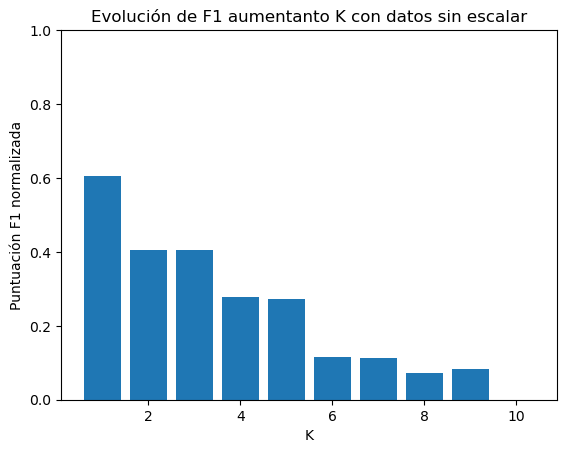

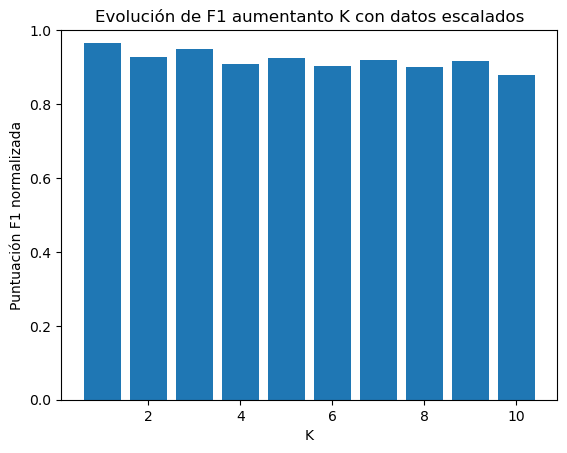

In [377]:
K = range(1,11)
plt.bar(K,f1_scores_raw)
plt.title('Evoluci√≥n de F1 aumentanto K con datos sin escalar')
plt.xlabel('K')
plt.ylabel('Puntuaci√≥n F1 normalizada')
plt.ylim(0,1)
plt.show()

plt.bar(K,f1_scores_scl)
plt.title('Evoluci√≥n de F1 aumentanto K con datos escalados')
plt.xlabel('K')
plt.ylabel('Puntuaci√≥n F1 normalizada')
plt.ylim(0,1)
plt.show()

**Observaciones**

1. Podemos observar que el escalado influye en buena medida con la ayuda de la buena clasificaci√≥n y desempe√±o del algortimo KNN
2. El algoritmo KNN present√≥ un mejor resultados que el algotimo dummy
3. Variando el n√∫mero de vecinos cercanos llegamos a la conclusi√≥n que desde el primer vecino, ya existe una buena clasificaci√≥n para estos datos.

# Tarea 3. Regresi√≥n (con regresi√≥n lineal)

Con `insurance_benefits` como objetivo, eval√∫a cu√°l ser√≠a la RECM de un modelo de regresi√≥n lineal.

Construye tu propia implementaci√≥n de regresi√≥n lineal. Para ello, recuerda c√≥mo est√° formulada la soluci√≥n de la tarea de regresi√≥n lineal en t√©rminos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¬øPuedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de caracter√≠sticas; cada fila es un caso, cada columna es una caracter√≠stica, la primera columna est√° formada por unidades- $y$ ‚Äî objetivo (un vector)- $\hat{y}$ ‚Äî objetivo estimado (un vector)- $w$ ‚Äî vector de pesos
La tarea de regresi√≥n lineal en el lenguaje de las matrices puede formularse as√≠:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una soluci√≥n anal√≠tica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La f√≥rmula anterior puede servir para encontrar los pesos $w$ y estos √∫ltimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30. Utiliza la m√©trica RECM para evaluar el modelo.

In [385]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y
        
    def predict(self, X):
        
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [387]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [389]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [391]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

lr = MyLinearRegression()

lr.fit(X_train_scl, y_train_scl)
print(lr.weights)

y_test_pred = lr.predict(X_test_scl)
eval_regressor(y_test_scl, y_test_pred)

[-6.50583302e-01 -7.31018901e-04  1.60816093e+00  1.08173008e-02
 -3.79749246e-02]
RMSE: 0.23
R2: 0.66


**Observaciones**

1. Se observa que para la regresi√≥n lineal los datos escalados presentan un menor error RMSE
2. Este proceso de escalados tambi√©n afecta en los valores de los pesos de la regresi√≥n claramente.
3. R2 se mantiene con el mismo valor.

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las caracter√≠sticas num√©ricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba c√≥mo quedar√°n los valores de las caracter√≠sticas despu√©s de la transformaci√≥n. Por cierto, la propiedad de invertibilidad es importante aqu√≠, as√≠ que aseg√∫rate de que $P$ sea realmente invertible.

Puedes revisar la lecci√≥n 'Matrices y operaciones matriciales -> Multiplicaci√≥n de matrices' para recordar la regla de multiplicaci√≥n de matrices y su implementaci√≥n con NumPy.

In [396]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [398]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [401]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [404]:
det = np.linalg.det(P)
print(det)

0.24339135998015468


Como el determinante de la matriz P es diferente de 0, la matriz P es invertible.

Otra forma es comprobando que <td>$A^{-1}A = AA^{-1} = I$:


In [407]:
I = np.linalg.inv(P.T @ P) @ P.T @ P
print(I)

[[ 1.00000000e+00 -2.22044605e-16  4.44089210e-16 -7.77156117e-16]
 [-1.11022302e-16  1.00000000e+00  2.22044605e-16  2.77555756e-16]
 [-1.77635684e-15 -1.11022302e-15  1.00000000e+00 -2.44249065e-15]
 [ 3.60822483e-16 -8.46545056e-16  2.84494650e-16  1.00000000e+00]]


¬øPuedes adivinar la edad o los ingresos de los clientes despu√©s de la transformaci√≥n?

S√≠, se debe volver a multiplar la matriz resultante de la tranformaci√≥n por la matriz P inversa

¬øPuedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a trav√©s de los c√°lculos moviendo $P$ del lado derecho de la f√≥rmula anterior al izquierdo. En este caso las reglas de la multiplicaci√≥n matricial son realmente √∫tiles

$$
X' = X \times P
$$
$$
X'\times P^{-1} = X 
$$

Muestra los tres casos para algunos clientes- Datos originales
- El que est√° transformado- El que est√° invertido (recuperado)

In [414]:
print(X[0:3])
X2 = X @ P
print(X2[0:3])
X1 = X2 @ np.linalg.inv(P)
print(X1[0:3])

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]]
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]]
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.18323146e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.36424205e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¬øCu√°l podr√≠a ser la raz√≥n de ello?

Una raz√≥n es que la computadora esta trabajando con punto flotante de 64 bits, eso hace que exprese el 0 de una forma muy peque√±a 

## Prueba de que la ofuscaci√≥n de datos puede funcionar con regresi√≥n lineal

En este proyecto la tarea de regresi√≥n se ha resuelto con la regresi√≥n lineal. Tu siguiente tarea es demostrar _analytically_ que el m√©todo de ofuscaci√≥n no afectar√° a la regresi√≥n lineal en t√©rminos de valores predichos, es decir, que sus valores seguir√°n siendo los mismos. ¬øLo puedes creer? Pues no hace falta que lo creas, ¬°tienes que que demostrarlo!

Entonces, los datos est√°n ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¬øC√≥mo se relacionar√≠an $w$ y $w_P$ si simplific√°ramos la f√≥rmula de $w_P$ anterior? 

¬øCu√°les ser√≠an los valores predichos con $w_P$? 

¬øQu√© significa esto para la calidad de la regresi√≥n lineal si esta se mide mediante la RECM?
Revisa el Ap√©ndice B Propiedades de las matrices al final del cuaderno. ¬°All√≠ encontrar√°s f√≥rmulas muy √∫tiles!

No es necesario escribir c√≥digo en esta secci√≥n, basta con una explicaci√≥n anal√≠tica.

**Respuesta**

La transformaci√≥n de los datos mediante una matriz invertible ùëÉ no afecta los valores predichos ni la calidad de la regresi√≥n lineal. Esto asegura que la ofuscaci√≥n de datos es segura en t√©rminos de preservar la calidad del modelo.

**Prueba anal√≠tica**

Regresi√≥n lineal con datos ofuscados:
$$
w_P = [(XP)^T XP]^{-1} (XP)^T y
$$
Expandiendo:
$$
(XP)^T XP = P^T X^T XP
$$
Entonces:
$$
w_P = [P^T X^T XP]^{-1} (P^T X^T) y
$$
RELACI√ìN ENTRE w y wp:
    -Usando la propiedad de inversi√≥n de matrices:
$$
[P^T X^T XP]^{-1} = P^{-1}(X^T X)
$$
Sustituyendo en la f√≥rmula de wp:
$$
w_P = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
Por propiedad de identidad multiplicativa:
$$
w_P = P^{-1}(X^T X)^{-1} X^T y
$$
Dado que $$ w = (X^T X)^{-1} X^T y, tenemos: $$
$$
w_P = P^{-1}w
$$

VALORES PREDICHOS CON wp:
$$
y_P = (XP)w_P
$$
Sustituyendo wp:
$$
y_P = (XP)(P^{-1}w)
$$
Por propiedad de identidad multiplicativa:
$$
y_P = Xw
$$
Esto demuestra que:
$$
y_P = y
$$
Dado que yp = y, los valores predichos no cambian, y por lo tanto:
$$
RECM_P = RECM
$$

## Prueba de regresi√≥n lineal con ofuscaci√≥n de datos

Ahora, probemos que la regresi√≥n lineal pueda funcionar, en t√©rminos computacionales, con la transformaci√≥n de ofuscaci√≥n elegida.
Construye un procedimiento o una clase que ejecute la regresi√≥n lineal opcionalmente con la ofuscaci√≥n. Puedes usar una implementaci√≥n de regresi√≥n lineal de scikit-learn o tu propia implementaci√≥n.
Ejecuta la regresi√≥n lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las m√©tricas RMSE y $R^2$. ¬øHay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de n√∫meros aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- Fue invertible al segundo intento
- Utiliza $XP$ como la nueva matriz de caracter√≠sticas

In [428]:
np.random.seed(0)
P = np.random.rand(4,4)
print(P)
det = np.linalg.det(P)
print(det)

[[0.5488135  0.71518937 0.60276338 0.54488318]
 [0.4236548  0.64589411 0.43758721 0.891773  ]
 [0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]]
0.13938851462425653


In [430]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y
        
    def predict(self, X):
        
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [432]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')   

In [434]:
X_ofus = X @ P

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train_ofus, X_test_ofus, y_train_ofus, y_test_ofus = train_test_split(X_ofus, y, test_size=0.3, random_state=12345)

lin_r = MyLinearRegression()

# Regresi√≥n con datos sin ofuscar
lin_r.fit(X_train, y_train)
print(lin_r.weights)

y_test_pred = lin_r.predict(X_test)
eval_regressor(y_test, y_test_pred)

# Regresi√≥n con datos ofuscados
lin_r.fit(X_train_ofus, y_train_ofus)
print(lin_r.weights)

y_test_pred_ofus = lin_r.predict(X_test_ofus)
eval_regressor(y_test_ofus, y_test_pred_ofus)


[-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66
[-0.94353848 -0.03865472  0.00560961  0.01189941  0.04854999]
RMSE: 0.34
R2: 0.66


Conclusi√≥n:

Los valores de peso cambiaron, lo que era de esperarse pero los errores mantuvieron su valor lo que demuestra que la t√©cnica de ofuscaci√≥n mantiene la calidad del modelo 

# Conclusiones

1. Se presentaron dato sin problemas aparentes
2. El an√°lisis exploratari√≥ no mostro relaciones concluyentes
3. En estos datos la distancia Euclediana mostro mejores resultados que la distania manhatan
4. El escalado de los datos mostr√≥ una mejora significativa tanto en los algoritmos KNN al encontrar las distancias y al clasificar como el de regresi√≥n lineal
5. En los primeros vecinos cercanos se logr√° una buena clasificaci√≥n y con datos escalados
6. Se demostr√≥ que la t√©cnica de ofuscaci√≥n preserva la calidad de los modelos afectando s√≥lo a los valores de pesos
7. Se implemet√≥ correctamente nuestro propio algoritmo de regresi√≥n lineal
8. Se aprendieron Propiedades de las matrices

# Ap√©ndices

## Ap√©ndice A: Escribir f√≥rmulas en los cuadernos de Jupyter

Puedes escribir f√≥rmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicaci√≥n de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las f√≥rmulas se ver√°n como las de los libros de texto.

Para incorporar una f√≥rmula a un texto, pon el signo de d√≥lar (\\$) antes y despu√©s del texto de la f√≥rmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una f√≥rmula debe estar en el mismo p√°rrafo, pon el doble signo de d√≥lar (\\$\\$) antes y despu√©s del texto de la f√≥rmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan f√≥rmulas en sus art√≠culos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en ingl√©s) de dos p√°ginas para aprender a componer las f√≥rmulas m√°s comunes.

## Ap√©ndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al √°lgebra lineal. Aqu√≠ se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba anal√≠tica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicaci√≥n</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposici√≥n de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>